<a href="https://colab.research.google.com/github/n8mcdunna/Traffic_stops/blob/master/Thursday/Unit_1_Build_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [225]:
df = pd.read_csv('http://users.stat.ufl.edu/~winner/data/trafficstop.csv')

In [226]:
# Description of data http://users.stat.ufl.edu/~winner/data/trafficstop.txt

In [227]:
# Changing dataframe column name and creatingn label variables
df.columns = ['Month', 'Reason for Stop', 'Officer Race', 'Officer Gender', 'Officer Years of Service', 'Driver Race', 'Driver Hispanic', 
              'Driver Gender', 'Driver Age', 'Search of Vehicle', 'Result of Stop']
reason_labels = ['Checkpoint', 'DWI', 'Investigation', 'Other', 'Safe\nMovement', 'Seatbelt', 'Speeding', 'StopLight\nor Sign', 'Vehicle\nMovement', 'Vehicle\nRegistry']
officer_race_labels = ['Native American', 'Asian', 'African American', 'Hispanic', 'White', 'Unspecified']
driver_race_labels = ['Asian', 'African American', 'Native American', 'Other/Unknown', 'White']
result_labels = ['No Action Taken', 'Verbal Warning', 'Written Warning', 'Citation', 'Arrest']

In [228]:
df['Officer Race'] = df['Officer Race'].replace(np.nan, 6) # replacing NaNs in officer race with 6. NaN did stand for undefined

In [229]:
# Dividing variables into categorical and numerical for t-tests
cat_variables = df.loc[:,['Month', 'Reason for Stop', 'Officer Race', 'Officer Gender', 'Driver Race', 'Driver Hispanic', 'Driver Gender', 'Search of Vehicle', 'Result of Stop']]
num_variables = df.loc[:,['Officer Years of Service', 'Driver Age']]

In [230]:
print(df.shape)
df.head()

(79884, 11)


,Month,Reason for Stop,Officer Race,Officer Gender,Officer Years of Service,Driver Race,Driver Hispanic,Driver Gender,Driver Age,Search of Vehicle,Result of Stop
0,8,8,3.0,0,22,2,2,1,40,0,2
1,1,8,5.0,1,18,2,2,1,26,1,4
2,1,8,5.0,1,18,2,2,0,25,0,2
3,11,7,3.0,0,23,5,1,1,41,0,2
4,12,7,3.0,0,23,5,2,1,53,0,2


In [231]:
# Putting age into categories to make cleaner looking graph
bins = [x for x in range(10, 80, 10)]
names = ['Teens', '20s', '30s', '40s', '50s', '60+']
df['Age Group'] = pd.cut(df['Driver Age'], bins, labels= names)

In [232]:
# Getting age group totals
drivers_by_age_group = df['Age Group'].value_counts(ascending= True)
df3 = pd.crosstab(df['Age Group'], df['Reason for Stop'], margins= True, normalize= True) * 100

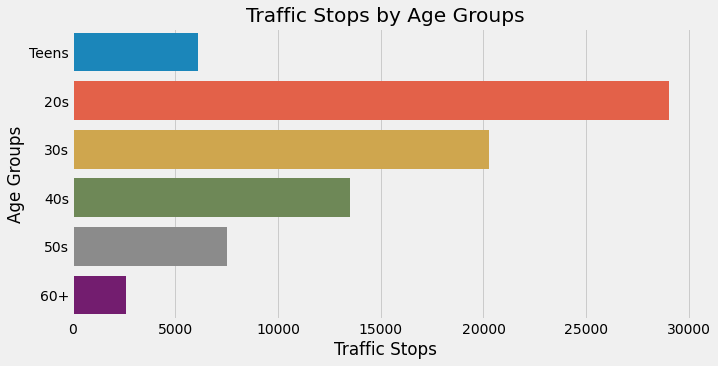

In [233]:
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')

# Figure dimensions
fig.set_figheight(5)
fig.set_figwidth(10)

bar_plot = sns.barplot(x= drivers_by_age_group, y= drivers_by_age_group.index)

bar_plot.set(xlabel= "Traffic Stops",
             ylabel= 'Age Groups',
             title= 'Traffic Stops by Age Groups')
plt.savefig('age_groups.png', bbox_inches= 'tight')
plt.show();

In [234]:
# Creating dataframe using percentages of reason for stop and age group
df4 = pd.crosstab(df['Reason for Stop'], df['Age Group'], margins= True, normalize= True) * 100
print(df4.columns)
print(df4.index)

Index(['Teens', '20s', '30s', '40s', '50s', '60+', 'All'], dtype='object', name='Age Group')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'All'], dtype='object', name='Reason for Stop')


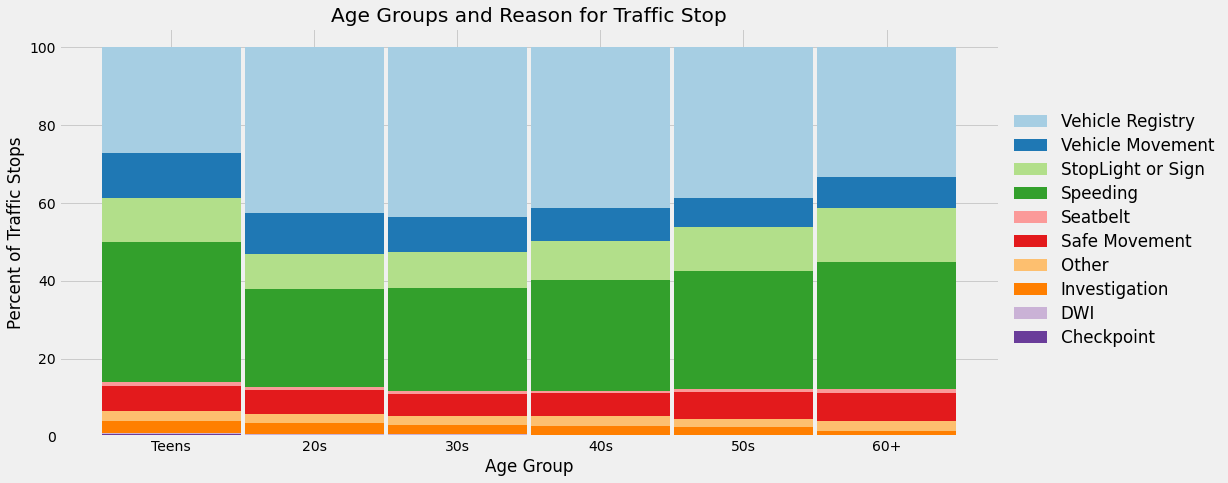

In [235]:
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')

# Creating colors for plotting. Used paired since it had 12 values and visually appealing
color = sns.color_palette('Paired', 11)[::-1]

for name in df4.columns[:-1]: # iterating through all columns except for 'All'
  foundation = 0
  for i in df4.index[:-1]: # iterating through all rows except for 'All'
    height = (df4[name][i] / df4[name]['All'])*100 # calculating percentages for each row and column
    ax.bar(x= name, bottom= foundation, height= height, width= 0.97, color= color[i]) # setting width to give a little gap, and iterating through color palette
    foundation += height

plt.title('Age Groups and Reason for Traffic Stop')
fig.set_figheight(7)
fig.set_figwidth(15)

ax.set_xlabel('Age Group')
ax.set_ylabel('Percent of Traffic Stops', fontsize= 'large')

reason_labels = ['Checkpoint', 'DWI', 'Investigation', 'Other', 'Safe Movement', 'Seatbelt', 'Speeding', 'StopLight or Sign', 'Vehicle Movement', 'Vehicle Registry']

# Used label spacing to reverse the order of the legend to match the graph and bbox to anchor to move legend to appropriate spot
ax.legend(labels= reason_labels, fontsize= 'large', loc='best', bbox_to_anchor=(1, .3), labelspacing= -2.5, frameon= False)

ax.set_xticklabels(df4.columns[:-1])
ax.set_xticks(ticks= [0, 1, 2, 3, 4, 5])

plt.savefig('age_group_and_result.png', bbox_inches= 'tight')
plt.show();

Performing chi square analysis on categorical variable. After performing analysis all of the categorical values are closely linked to each other due to their very small p-values.

In [236]:
# Performing statistical analysis on categorical variables
def chi_square(column_name):
  results = [(column, chi2_contingency(pd.crosstab(cat_variables[column], cat_variables[column_name]))[1]) for column in cat_variables.columns]
  results = pd.DataFrame(results)
  results.columns = ['Variable', 'p-value']
  results = results.sort_values(by= ['p-value'])
  return results

In [237]:
chi_square('Reason for Stop')

,Variable,p-value
1,Reason for Stop,0.000000e+00
4,Driver Race,0.000000e+00
7,Search of Vehicle,0.000000e+00
8,Result of Stop,0.000000e+00
5,Driver Hispanic,1.239846e-139
2,Officer Race,1.467362e-133
0,Month,5.973070e-127
3,Officer Gender,3.315326e-125
6,Driver Gender,1.074974e-77


In [238]:
chi_square('Result of Stop')

,Variable,p-value
1,Reason for Stop,0.000000e+00
7,Search of Vehicle,0.000000e+00
8,Result of Stop,0.000000e+00
2,Officer Race,2.701179e-261
6,Driver Gender,5.981797e-87
4,Driver Race,1.027880e-83
0,Month,5.788958e-54
5,Driver Hispanic,4.732458e-47
3,Officer Gender,6.830459e-11


In [239]:
chi_square('Search of Vehicle')

,Variable,p-value
1,Reason for Stop,0.000000e+00
7,Search of Vehicle,0.000000e+00
8,Result of Stop,0.000000e+00
6,Driver Gender,1.137851e-195
4,Driver Race,5.338474e-160
2,Officer Race,2.020537e-28
3,Officer Gender,4.963004e-08
5,Driver Hispanic,1.837276e-04
0,Month,1.871583e-03


In [240]:
df2 = pd.crosstab(df['Result of Stop'], df['Reason for Stop'], margins= True, normalize= True)*100

In [241]:
# Sorting values smallest to largest to create cleaner graph
df2 = df2.sort_values(by= 'All', axis= 1)
df2

Reason for Stop,2,1,6,4,3,5,9,8,7,10,All
Result of Stop,,,,,,,,,,,
1,0.003755,0.011266,0.007511,0.250363,0.503230,0.068850,0.186520,0.058835,0.115167,1.190476,2.395974
2,0.017525,0.045065,0.388063,1.032747,0.843723,4.102198,7.155375,6.443092,8.617495,21.513695,50.158981
3,0.000000,0.005007,0.026288,0.177758,0.062591,0.230334,0.389315,0.505733,1.689950,1.162936,4.249912
4,0.013770,0.269140,0.331731,0.817435,0.794903,1.512193,1.473386,2.806570,17.141105,16.057033,41.217265
5,0.107656,0.027540,0.036303,0.132692,0.289169,0.128937,0.227830,0.132692,0.254118,0.640929,1.977868
All,0.142707,0.358019,0.789895,2.410996,2.493616,6.042512,9.432427,9.946923,27.817836,40.565069,100.000000


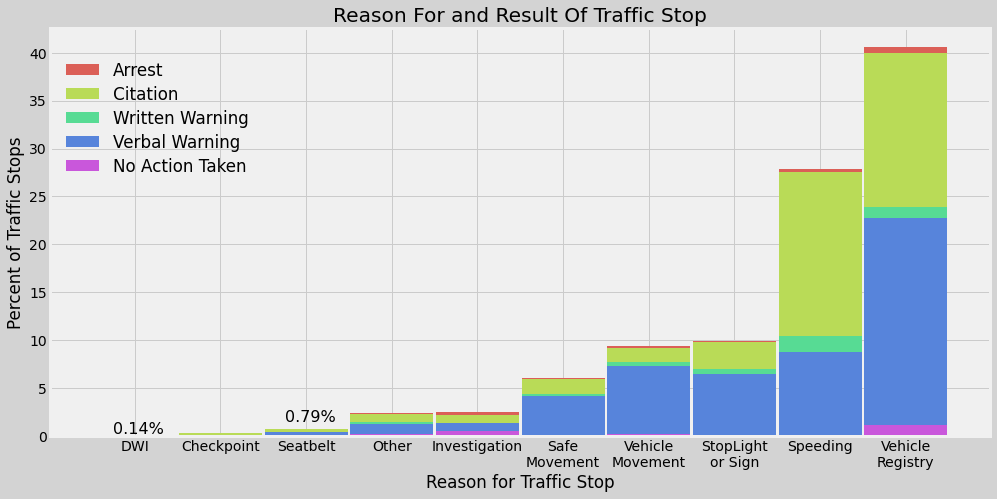

In [243]:
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')

color = sns.color_palette('hls', 5)

k = 0 # Used k to keep track of where to plt on the x-axis
for x in df2.columns[:-1]:
  foundation = 0
  k += 1
  for i in df2.index[:-1]:
    height = df2[x][i]
    ax.bar(x= k, bottom= foundation, height= height, width= 0.97, color= color[5-i])
    foundation += height

# Adding text to highlight attributes of the data
ax.text(0.75, 0.3, s= '0.14%', fontsize= 16)
ax.text(2.75, 1.5, s= '0.79%', fontsize= 16)

plt.title('Reason For and Result Of Traffic Stop')
fig.set_figheight(7)
fig.set_figwidth(15)
fig.set_facecolor('lightgrey')
ax.set_xlabel('Reason for Traffic Stop')
ax.set_ylabel('Percent of Traffic Stops', fontsize= 'large')

# Used bbox to anchor to move legend to appropriate spot
ax.legend(labels= result_labels, fontsize= 'large', labelspacing= -2.5, frameon= False, loc= 'upper left', bbox_to_anchor = (0, 0.72))


reason_labels = ['DWI','Checkpoint','Seatbelt','Other','Investigation','Safe\nMovement','Vehicle\nMovement','StopLight\nor Sign','Speeding','Vehicle\nRegistry']
ax.set_xticklabels(reason_labels)
ax.set_xticks(ticks= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.savefig('reason_and_result.png', bbox_inches= 'tight')
plt.show();